# SSICOV RSVD Example

Run this notebook from the `examples/` directory so `data/BridgeData.mat` is found.


In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.signal import periodogram

from fast_ssi import cluster_data_by_frequency, plotStabDiag
from fast_ssi.SSICOV_RSVD import SSICOV

DATA_DIR = Path("data").resolve()
mat = loadmat(DATA_DIR / "BridgeData.mat")
t, rz, wn = mat["t"], mat["rz"], mat["wn"]

## Load and prepare the dataset

The bridge data contains:
- `t`: time vector
- `rz`: displacement measurements from multiple sensors
- `wn`: natural frequencies (target values for validation)

The data is loaded from a MATLAB file and will be used to identify the modal parameters of the bridge structure.

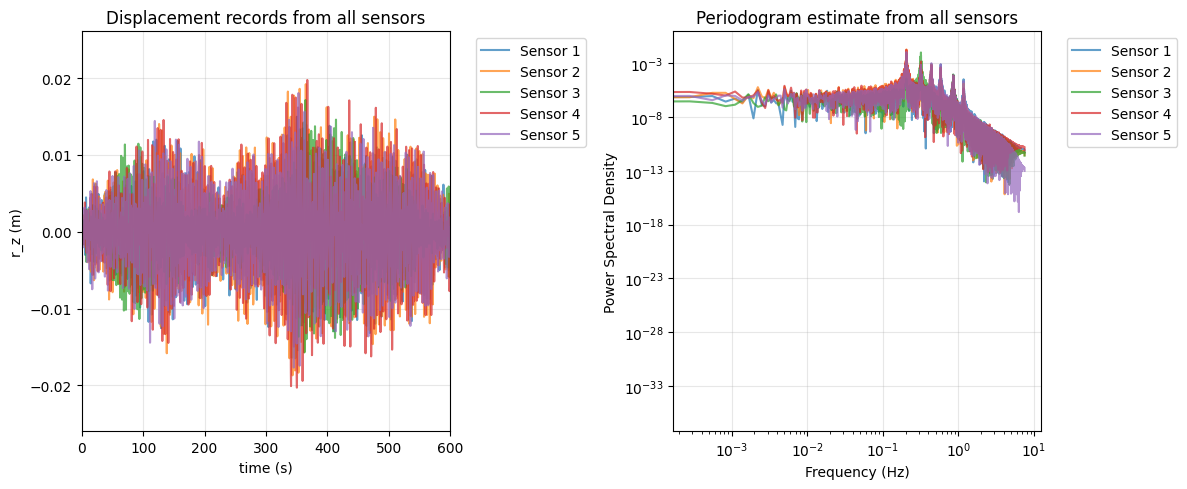

In [6]:
# Quick visualization of the loaded data
dt = np.median(np.diff(t))
fs = 1 / dt

plt.figure(figsize=(12, 5))

# Plot sensor data
plt.subplot(121)
for i in range(rz.shape[0]):
    plt.plot(t[0], rz[i, :], alpha=0.7, label=f"Sensor {i + 1}")
plt.xlim([0, 600])
plt.xlabel("time (s)")
plt.ylabel("r_z (m)")
plt.title("Displacement records from all sensors")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

# Plot periodogram
plt.subplot(122)
for i in range(rz.shape[0]):
    f, Pxx = periodogram(rz[i, :], fs=fs)
    plt.plot(f, Pxx, alpha=0.7, label=f"Sensor {i + 1}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Periodogram estimate from all sensors")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.gcf().set_facecolor("w")
plt.show()

In [7]:
def plot_data(t, rz, wn):
    _fn_target = wn / (2 * np.pi)
    dt = np.median(np.diff(t))
    fs = 1 / dt

    plt.figure(figsize=(12, 5))

    # Subplot 1: Sensor data
    plt.subplot(121)
    for i in range(rz.shape[0]):
        plt.plot(t[0], rz[i, :], alpha=0.7, label=f"Sensor {i + 1}")
    plt.xlim([0, 600])
    plt.xlabel("time (s)")
    plt.ylabel("r_z (m)")
    plt.title("Displacement records from all sensors")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    # Subplot 2: Periodogram
    plt.subplot(122)
    for i in range(rz.shape[0]):
        f, Pxx = periodogram(rz[i, :], fs=fs)
        plt.plot(f, Pxx, alpha=0.7, label=f"Sensor {i + 1}")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.title("Periodogram estimate from all sensors")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.gcf().set_facecolor("w")
    plt.show()

## Visualization function

The `plot_data` function creates a 2x2 subplot showing:
- Time-domain displacement records from sensors 2 and 5
- Power Spectral Density (PSD) estimates to identify dominant frequencies

This helps visualize the input data quality and frequency content before running the SSI algorithm.

## Run SSI-COV with Randomized SVD and visualize results

Here we:
1. Set the SSI parameters:
   - `fs = 15`: Sampling frequency (Hz)
   - `Ts = 10`: Time lag parameter
   - `Nmin = 7, Nmax = 50`: Range of model orders to test
   - `Nc`: Number of channels (sensors)

2. Initialize and run the SSICOV algorithm using randomized SVD (RSVD) for efficiency

3. Cluster the identified poles by frequency to group similar modes

4. Plot the stabilization diagram showing stable poles across model orders

5. Display the input data and PSD estimates for validation

NexT, elapsed time: 0.068024 seconds
Selected Rank:107
 RSVD Elapse time 0.006414175033569336s
blockToeplitz, elapsed time: 0.016098 seconds
modalID, elapsed time: 0.003359 seconds
modalID, elapsed time: 0.003182 seconds
stabilityCheck, elapsed time: 0.002178 seconds
modalID, elapsed time: 0.002971 seconds
stabilityCheck, elapsed time: 0.001855 seconds
modalID, elapsed time: 0.002824 seconds
stabilityCheck, elapsed time: 0.001919 seconds
modalID, elapsed time: 0.002748 seconds
stabilityCheck, elapsed time: 0.002180 seconds
modalID, elapsed time: 0.002622 seconds
stabilityCheck, elapsed time: 0.001774 seconds
modalID, elapsed time: 0.002423 seconds
stabilityCheck, elapsed time: 0.001665 seconds
modalID, elapsed time: 0.002438 seconds
stabilityCheck, elapsed time: 0.001858 seconds
modalID, elapsed time: 0.002254 seconds
stabilityCheck, elapsed time: 0.001692 seconds
modalID, elapsed time: 0.002113 seconds
stabilityCheck, elapsed time: 0.001468 seconds
modalID, elapsed time: 0.002024 seco

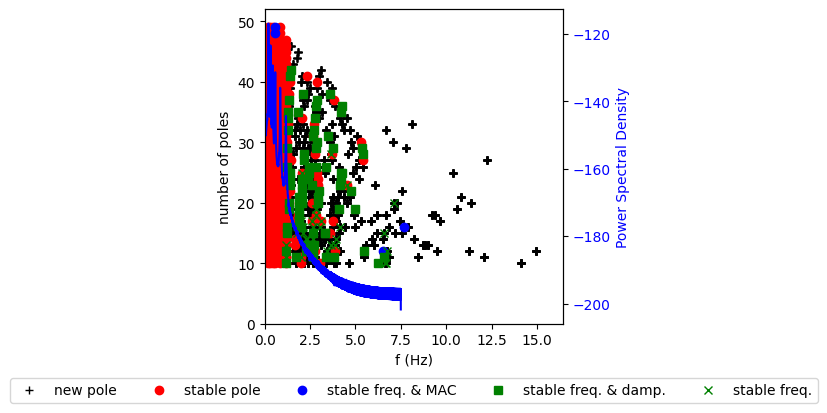

In [ ]:
fs = 15
acc = rz.T
Nmin = 7
Nmax = 50
Nc = acc.shape[1]
Ts = 10

ssi = SSICOV(acc, fs, Ts, Nc, Nmax, Nmin)
fnS, zetaS, phiS, MACS, stability_status, fn2 = ssi.run()

num_clusters = 6
cluster_data_by_frequency(fnS, zetaS, phiS, num_clusters)
plotStabDiag(fn2, acc, fs, stability_status, Nmin, Nmax, acc.shape[1], 0, 7.5)